## Εθνικό Μετσόβιο Πολυτεχνείο 
## Σχολή Ηλεκτρολόγων Μηχανικών & Μηχανικών Υπολογιστών


### Μάθημα: Στοχαστικές διαδικασίες
### Διδάσκων: Μιχαήλ Λουλάκης
### Ακαδημαϊκό έτος: 2017-2018


### Ιωάννης Κ. Γεωργακόπουλος
### Α.Μ.: 03111512


# 5η Εργαστηριακή Άσκηση

Στα πλαίσια του εργαστηρίου θα χρησιμοποιήσουμε τις παρακάτω βιβλιοθήκες.

In [1]:
import numpy as np
from numpy import random, pi
from numpy.random import choice

import matplotlib.pyplot as plt

from simple_markov_chain_lib import markov_chain

## Άσκηση 1



In [2]:
## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

init_dist = {1: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.

mc = markov_chain(markov_table, init_dist)

N = 100000

##Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
visits = {state: 0 for state in (1, 2, 3, 4)} 

mc.start()
completed = 0

##Simulate N excursions. Every time we complete an excursion we increase completed by 1.
while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    if mc.running_state == 1:
        completed +=1

print("Expected Visits starting from 1:")
for x, y in visits.items():
    print("%d: %.3f" % (x, y / N))


Expected Visits starting from 1:
1: 1.000
2: 0.496
3: 2.522
4: 1.388


### Απάντηση στο Ερώτημα 1.

Παρόλο που καλέσαμε την mc.start() μόνο μία φορά, χρησιμοποιώντας την completed, ορίζουμε με τον επαναληπτικό βρόχο while κάθε πραγματοποίηση να τελειώνει από την επιστροφή στην κατάσταση 1.

Αυτό που μας εξασφαλίζει ότι η προσέγγισή μας είναι σωστή είναι η $Ισχυρή$ $Μαρκοβιανή$ $Ιδιότητα$ (Strong Markov Property), σύμφωνα με την οποία, μετά από έναν χρονο διακοπής μπορεί να θεωρηθεί ως μια νέα ανεξάρτητη αλυσίδα με τις ίδιες πιθανότητες μετάβασης.

## Ερώτημα 2

Στη συνέχεια θα τροποποιήσουμε τον κώδικα ώστε να λάβουμε προσεγγιστικά την κατανομή $\pi_1$ του Θεωρήματος 19. Θα το υλοποιήσουμε σε συνάρτηση ώστε να το χρησιμοποιήσουμε και στα επόμενα ερωτήματα.

Αυτό που λείπει από τον παραπάνω κώδικα, είναι η αποθήκευση του χρόνου επιστροφής στην κατάσταση i.

In [3]:
def Monte_Carlo_Unchanged(i, N):
    init_dist={i: 1.0}
    mc = markov_chain(markov_table, init_dist)
    visits = {state: 0 for state in (1, 2, 3, 4)} 
    mc.start()
    completed = 0
    t=0 #Συνολικός χρόνος μέχρι να τελειώσει η προσομοίωση
    while completed < N:
        visits[mc.running_state] += 1
        mc.move()
        t += 1
        if mc.running_state == i:
            completed +=1
    print("Τα στοιχεία της κατανομής π_{0} είναι τα εξής:".format(i))
    for x, y in visits.items():
        print("%d: %.3f" % (x, y / t)) #Τα Ν απαλείφονται
        

i= 1   # Παραμετροποιούμε την αρχική κατάσταση.
N = 100000

Monte_Carlo_Unchanged(i, N)


Τα στοιχεία της κατανομής π_1 είναι τα εξής:
1: 0.186
2: 0.094
3: 0.461
4: 0.259


Βλέπουμε ότι συγκλίνουν στις θεωρητικές τιμές που υπολογίσαμε 
    {
    1: 18/97,
    2: 9/97,
    3: 45/97,
    4: 25/97
    }
, οπότε όλα Λιτλ Πόυ. 

Επίσης, τρέχοντάς το 3-4 φορές, βλέπουμε ότι η διασπορά των τιμών είναι ικανοποιητική.

## Ερώτημα 3

Έχοντας υλοποιήσει την προσομοίωση ως συνάρτηση, το μόνο που χρειάζεται να αλλάξουμε είναι η i.

In [4]:
for i in (2,3,4):
    Monte_Carlo_Unchanged(i, N)

Τα στοιχεία της κατανομής π_2 είναι τα εξής:
1: 0.186
2: 0.093
3: 0.462
4: 0.259
Τα στοιχεία της κατανομής π_3 είναι τα εξής:
1: 0.186
2: 0.093
3: 0.463
4: 0.259
Τα στοιχεία της κατανομής π_4 είναι τα εξής:
1: 0.186
2: 0.093
3: 0.462
4: 0.258


Παρατηρούμε ότι οι κατανομές δεν αλλάζουν σημαντικά, πράγμα αναμενόμενο.

Πρακτικά αυτό που αλλάξαμε, είναι την τιμή της init.dist(i) και τη συνθήκη if mc.running_state == i:, τα οποία μας εξασφαλίζουν ότι υπολογίζουμε τα $\pi_2$, $\pi_3$, $\pi_4$.

## Άσκηση 2


Θεωρούμε $N=10^6$ δείγματα στον κύβο με κέντρο το (0,0,0) και πλευρά 2. Θα εκτιμήσουμε αριθμητικά τον όγκο της μοναδιαίας σφαίρας σε 3 διαστάσεις και θα την συγκρίνουμε με τη θεωρητική τιμή $V(3) = \frac{4 \pi}{3}$.

In [5]:
from numpy import random, pi

Ntrials, Nhits =  10 ** 6, 0

for n in range(Ntrials):
    x, y, z = random.uniform(-1, 1, 3) # draw 3 samples, each uniformly distributed over (-1,1)
    if x**2 + y**2 + z**2 < 1:
        Nhits += 1

        
print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the sphere %d" % Nhits)

print("Monte Carlo estimator of V(3): %.5f" % (8*Nhits / Ntrials))
print("Actual value of V(3) up to 5 decimal digits: %.5f" % (4*(pi)/3))  
print("The relative error is %.5f%%" % (100 * abs(1- (6*Nhits)/(pi * Ntrials))))

Total number of samples drawn 1000000
Number of samples in the sphere 523022
Monte Carlo estimator of V(3): 4.18418
Actual value of V(3) up to 5 decimal digits: 4.18879
The relative error is 0.11016%


## Ερώτημα 2

Θα λάβουμε ένα δείγμα $N=10.000$ σημείων με ομοιόμορφη κατανομή στον λημνίσκο  

$$L = \{(x, y) \in \mathbb{R}^2: {\left(x^2 + y^2 \right)}^2 \leq 2|xy|\, \}$$

Total number of samples drawn in the square S: 19881
Number of samples in the Lemniscate L: 10000


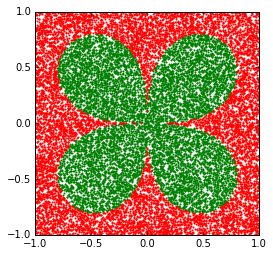

In [6]:
# Parameters
N = 10000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if (x**2 + y**2)**2 < 2*abs(x*y):
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn in the square S: %d" % Ntrials)
print("Number of samples in the Lemniscate L: %d" % N)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

Βλέπουμε λοιπόν, ότι για να χτίσουμε τον (διπλό;) λημνίσκο, μας χρειάστηκε ~διπλάσιος αριθμός δειγμάτων. Ωραίο τετράφυλλο τριφύλλι πάντως. Μου θυμίζει τον Γκαστόνε.

## Ερώτημα 3

Στην αρχή εκλιμακωθήσα (ΣτΜ: σκάλωσα) για το πως θα πάρω ομοιόμορφα δείγματα από τον λημνίσκο, αλλά μετά θυμήθηκα πως έχουμε ήδη τις λίστες με τα σημεία του έτοιμες (acc_x, acc_y). Οπότε όλα πάρκερ.

Έχοντας λοιπόν τις λίστες με τα σημεία (x,y) του λημνίσκου, μπορούμε να λάβουμε δείγματα από αυτές με ομοιόμορφη κατανομή. Οπότε μπορούμε εύκολα, έχοντας υπόψιν και την υπόδειξη της εκφώνησης, να υπολογίσουμε το ολοκλήρωμα:

$$L = \{(x, y) \in \mathbb{R}^2: {\left(x^2 + y^2 \right)}^2 \leq 2|xy|\, \}$$


Έχουμε λάβει 10.000 σημεία για τον λημνίσκο, οπότε θα εργαστούμε με Ν=10.000
Ας ξεκινήσουμε:

Αρχικά θα υπολογίσουμε το εμβαδόν του λημνίσκου, το οποίο υπολογίζεται ως $|S|* L/S$

In [7]:
Lemnisc_Area = (4*N)/Ntrials

print('Το εμβαδόν του λημνίσκου είναι: %.5f' %(Lemnisc_Area))

Το εμβαδόν του λημνίσκου είναι: 2.01197


Στη συνέχεια θα υπολογίσουμε το ολοκλήρωμα που ζητήθηκε. Αυτό θα υπολογίζεται ως το εμβαδό του λημνίσκου επί την αναμενόμενη τιμή $\mathbb{E}\big[\,|\,X_1+X_2\,|\,\big]$. Μιας και το δείγμα μας είναι μικρό ($10.000$ σημεία), μπορούμε απλά να το πάρουμε όλο για να ελαχιστοποιήσουμε το σφάλμα. Η κατανομή παραμένει ομοιόμορφη αφού τα παίρνουμε όλα με πιθανότητα 1. Προφανώς το αποτέλεσμα παραμένει πιθανοκρατικό, αφού λαμβάνει ως είσοδο δεδομένα από το προηγούμενο Monte Carlo.

In [8]:
Nhits=0
I = 0
for n in range(N):
    I += abs(acc_x[n]+acc_y[n])
I = I/N #Η αναμενόμενη τιμή
I = I*Lemnisc_Area
print('To ζητούμενο ολοκλήρωμα έχει τιμή:  %5f'%(I))
    

To ζητούμενο ολοκλήρωμα έχει τιμή:  0.984491
